<img src="images/GMIT logo.jpeg" width="350" align="center">

# Programming for Data Analysis Project 2019

Peter McGowan
G00190832

### Tasks:
1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.
3. Synthesise/simulate a data set as closely matching their properties as possible.
4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Background

I have chosen to simulate data about Adult Education in Ireland. I have chosen the following variables:
* Highest Qualification Awarded
* Field of Study
* Gender
* Age

## Research and Investigate

### General

The Central Statistics Office (CSO) is perhaps best known for carrying out a census every 5 years in Ireland (most recently in 2016). In addition to this, the CSO carries out a range of other important statistical work covering a broad range of themes on a rotational basis.

The General Household Survey occurs approximately quarterly and the theme varies. In Q3 & Q4 2019 the theme covered was Adult Education. Considering the HDip in Data Analytics and the makeup of its student cohort (myself included), the Adult Education Survey (AES) immediately piqued my interest when I came across it.

*** links to documents

Considering the results of this survey and the characteristics of its variables studied, I will simulate a dataset matching its qualities.

### Sample Data Characteristics

The design sample size for the survey carried out was 13,200. Of this, 4,863 valid responses were collated. I intend to simulate the 334 <i>"Persons aged 25-64 who participated in formal education, classified by the level of education participation."</i>

### Level of Education Participation

The National Framework of Qualifications (NFQ) outlines a ten level framework for qualifications.

https://nfq.qqi.ie/

NFQ Level:
0. No formal education or training
1. Primary or below
2. Primary or below
3. Lower Secondary
4. Higher Secondary, Post Leaving Certificate
4. Higher Secondary, Post Leaving Certificate
6. Post Leaving Certificate, Higher Certificate and Equivalent
7. Ordinary Degree or Equivalent
8. Honours Bachelor Degree, Graduate Diploma, Higher Diploma
9. Masters Degree, Post Graduate Diploma
10. Doctoral Degree, Higher Doctorate

Unfortunately, the AES aggregates these levels into the following categories for my sample group:
* Higher Secondary or Below (14.60%)
* Post Leaving Certificate (30.30%)
* Third Level Non-Honours Degree (17.60%)
* Third Level Honours Degree or Higher (37.50%)

Without further information, I will simulate a dataset approximating this range, with 4 categories. I will try and find another way to break this down if I can.

### Field of Study

The AES categories education into 12 different fields:
* General Programmes & Qualifications (5.70%)
* Education (8.20%)
* Arts and Humanities (4.70%)
* Social Sciences, Journalism and Information (1.50%)
* Business, Administration and Law (27.10%)
* Natural Sciences, Mathematics and Statistics (3.70%)
* Information and Communication Technologies (6.70%)
* Engineering, Manufacturing and Construction (7.10%)
* Agriculture, Forestry, Fisheries and Veterinary (2.80%)
* Health and Welfare (18.00%)
* Services (2.20%)
* Other (12.20%)

The AES does <u>not</u> tell us if or how the educational category is related to the level of qualification, in other words the variables are independent of each other, however they may both be related to other variables.

### Gender

The gender breakdown of those who participated in an educational activity as given in the AES report is:
* Male: 36.53%
* Female: 63.47%

The survey would indicate that females are almost twice as likely to participate in adult education. The simulated dataset will therefore reflect this.

Comparing percentages of males vs females participating in each educational field is interesting, with many fields being strongly weighted towards one gender.

Looking at how gender relates to level of education participation, it is also clear that gender is correlated with field of study. For example, males are actually twice as likely to study at 3rd Level non honours degree than females.

The gender for each row in the simulated data will therefore have to take into account three things:
* Overall gender ratio participating in adult education
* Gender ratio for each level of education participation
* Gender ratio for each field of study

This is beginning to get quite complex.

### Age

The age range covered by the survey was 18-64, however the results are presented only from ages 25-64. This gives me a convenient range for the simulated ages. Results were presented in the following bands:
* 25-34 year olds
* 35-44 year olds
* 45-54 year olds
* 55-64 year olds

In constructing the dataset it will not be necessary to limit the simulated ages to these bands - I will use the 2016 census data to generate an appropriate distribution.

Much like the gender variable, age relates to both level of education participation and field of study. Are age and gender also related? The AES doesn't actually tell us this - presumably this is due to the sample size, as this can be ascertained for those participating in non-formal education. The 2016 Census cannot provide any more information here either.

It would be reasonable to presume that there is a good chance that age and gender are related here but I have no way of directly controlling it - this will have to be simulated indirectly through the other relationships. Age will therefore have to take into account:
* Overall age ranges and their likely distributions
* Age distribution for each level of education participation
* Age distribution for each field of study

### Approach

The approach to take now bears some serious consideration - considering the indirect relationships that have to be modelled, the order of variables modelled will be critical. I will therefore take the following approach:
1. Simulate the ages first - this will require the combination of distributions for each each range given, based on actual age distributions from the 2016 Census;
2. Simulate field of study - the relative probability of each field will take into account the age (range) of the simulated person;
3. Simulate the level of education participation - the relative probability of each level will take into account the age (range) of the simulated person;
4. Simulate the gender - this must take into account both items 2. and 3., as well as the overall gender ratio in the sample.

## Synthesise

### Preliminaries

Firstly, import several libraries to manage, simulate and visualise.

In [1]:
# Import numpy to analyse it
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Magic command to ensure that plots render inline
%matplotlib inline

In [3]:
# Control Seaborn aesthetics
# Use darkplot plot style for contrast
sns.set_style("darkgrid")
# Set the default colour palette
sns.set_palette("colorblind")

## Generate Data

First we will create an empty pandas dataframe to hold the data.

In [4]:
df = pd.DataFrame(columns = ["Age", "Field", "Qual", "Gender"])

In [5]:
df

,Age,Field,Qual,Gender


### Age Data

The age distribution should be realistic. We will import data from the Central Statistics Office that describes the ages recorded by the 2016 Census. Although this is a measure of the distribution of ages of the entire population, we will assume that the distribution holds true for our sample set.

The data has been generated and downloaded as a csv from ############
Only ages from 25 to 64 have been considered. We can read in the CSV to a new DataFrame for some basic analysis.

In [6]:
f = pd.read_csv("data\Population_2016_by_Age_adj.csv") # Import csv file using pandas
dfAge = pd.DataFrame(f) # Create a dataframe from the csv data
dfAge.describe()

,Age,Male,Female,Total
count,40.000000,40.000000,40.000000,40.000000
mean,44.500000,31263.000000,32269.350000,63532.350000
std,11.690452,4761.638729,5265.152836,9984.039203
min,25.000000,22402.000000,22642.000000,45044.000000
25%,34.750000,28163.750000,28551.500000,56858.500000
50%,44.500000,30787.000000,31522.000000,62390.000000
75%,54.250000,35342.750000,35973.750000,71409.000000
max,64.000000,40892.000000,42304.000000,83196.000000


There is a lot of data here - a visualisation would be appropriate. We can generate a "relplot" in Seaborn to relate Age to population numbers.

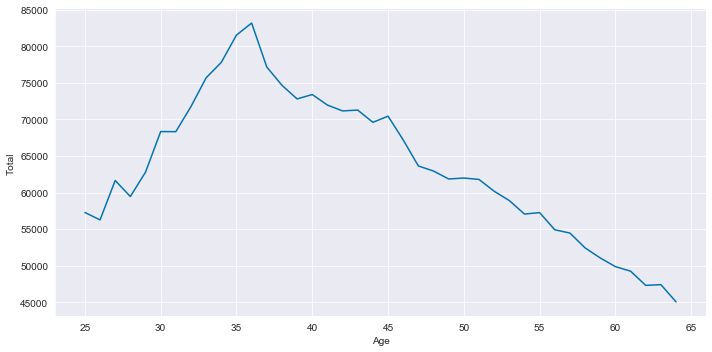

In [7]:
sns.relplot(x="Age", y="Total", kind="line", data=dfAge, height=5, aspect=2)

The age profile rapidly rises from 25 to the mode (somewhere slightly above 35) and then generally reduces more gradually towards 64.

We will now need to carry out some more complex statistical analysis of the input data. Simply return the mean or standard deviation of the ages will not prove very useful here as they need to be weighted by the population. The statsmodels package has a descriptive statistics with weights module (DescrStatsW) that will be very useful, we can import that first.

In [8]:
from statsmodels.stats.weightstats import DescrStatsW

Now we can use it to generate a weighted age profile from the Age and Total columns.

In [9]:
wAge = DescrStatsW(dfAge["Age"], weights=dfAge["Total"])
print("Weighted mean age:", round(wAge.mean, 2))
print("Weighted standard deviation:", round(wAge.std, 2))

Weighted mean age: 43.33
Weighted standard deviation: 10.97


#########The next step will be to create a new column with the proportion of population for each age.

In [10]:
# Creating a proportion column
dfAge["Proportion"] = dfAge["Total"]/dfAge["Total"].sum()

In [11]:
ageFill = np.random.choice(dfAge["Age"], 334, p=dfAge["Proportion"])

In [12]:
ageFill.mean()

42.90119760479042

The age profile of the population range that we are looking at approximates a triangular distribution - conveniently numpy includes this in the numpy.random module. One key piece of information that we need is the mode of the data. We can import the scipy stats module to extract this from the data.

In [13]:
from scipy import stats
m = stats.mode(ageFill)[0][0]

In [14]:
ageTri = np.random.triangular(0, m, 100, 100000)

In [15]:
np.rint(ageTri) 
ageTri.astype(int) ## this may not be working properly

array([32, 57, 71, ..., 47, 80, 79])

In [16]:
ageExcl = np.concatenate([np.arange(25), np.arange(65, 100)])

In [17]:
ageTri = ageTri[ageTri >= 25]
ageTri = ageTri[ageTri < 65]

In [18]:
ageTri = np.sort(ageTri) 
ageTri

array([25.00022967, 25.00258932, 25.00279408, ..., 64.99855914,
       64.99937586, 64.99937675])

In [19]:
ageTri.shape

(63801,)

In [20]:
ageTri.mean()

44.82587769419755

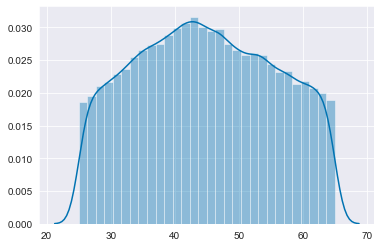

In [21]:
sns.distplot(ageTri, bins = 30)

In [22]:
ssize = 334

skip = ageTri.shape[0]/ssize+1

skipint = int(round(skip,0))
print(skip, skipint)

192.02095808383234 192


In [23]:
arr = np.array([0])
skipcurrent = 0.0
skiptotal = 0
while skiptotal < ageTri.shape[0]:
    skipcurrent = skipcurrent + skip
    skiptotal = int(round(skipcurrent,0))  
    arr = np.append(arr, skiptotal)

In [24]:
arr

array([    0,   192,   384,   576,   768,   960,  1152,  1344,  1536,
        1728,  1920,  2112,  2304,  2496,  2688,  2880,  3072,  3264,
        3456,  3648,  3840,  4032,  4224,  4416,  4609,  4801,  4993,
        5185,  5377,  5569,  5761,  5953,  6145,  6337,  6529,  6721,
        6913,  7105,  7297,  7489,  7681,  7873,  8065,  8257,  8449,
        8641,  8833,  9025,  9217,  9409,  9601,  9793,  9985, 10177,
       10369, 10561, 10753, 10945, 11137, 11329, 11521, 11713, 11905,
       12097, 12289, 12481, 12673, 12865, 13057, 13249, 13441, 13633,
       13826, 14018, 14210, 14402, 14594, 14786, 14978, 15170, 15362,
       15554, 15746, 15938, 16130, 16322, 16514, 16706, 16898, 17090,
       17282, 17474, 17666, 17858, 18050, 18242, 18434, 18626, 18818,
       19010, 19202, 19394, 19586, 19778, 19970, 20162, 20354, 20546,
       20738, 20930, 21122, 21314, 21506, 21698, 21890, 22082, 22274,
       22466, 22658, 22850, 23043, 23235, 23427, 23619, 23811, 24003,
       24195, 24387,

In [25]:
arr.shape

(334,)

In [26]:
ageTriSub = np.array([])
ageTriSub

array([], dtype=float64)

In [27]:
np.argmax(ageTri)

63800

In [28]:
for i in arr:
    if i <= np.argmax(ageTri):
        ageTriSub = np.append(ageTriSub, ageTri[i])

In [29]:
ageTriSub

array([25.00022967, 25.17242811, 25.35477792, 25.5012266 , 25.64859478,
       25.81031342, 25.95033026, 26.12738759, 26.29468861, 26.44886072,
       26.59408234, 26.75772155, 26.88965992, 27.03889951, 27.17619588,
       27.35657948, 27.52250939, 27.68690202, 27.84255391, 27.98663446,
       28.11919777, 28.24731009, 28.37325638, 28.51748377, 28.6660904 ,
       28.8083616 , 28.96483478, 29.10847568, 29.26027849, 29.40370356,
       29.53714514, 29.66404665, 29.81173589, 29.95132688, 30.08688118,
       30.22828019, 30.35890965, 30.49434714, 30.6291005 , 30.76903802,
       30.90214481, 31.02666291, 31.16407614, 31.29592867, 31.41961429,
       31.55356603, 31.67840178, 31.8129288 , 31.94258083, 32.07168799,
       32.19985123, 32.32008924, 32.44901936, 32.5729853 , 32.70477408,
       32.83109818, 32.95294877, 33.07685463, 33.19416919, 33.3164669 ,
       33.42835411, 33.54818259, 33.66688905, 33.77837057, 33.90757109,
       34.02492146, 34.13024241, 34.25160444, 34.36656016, 34.48

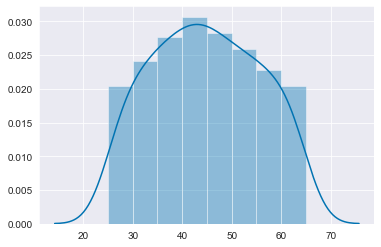

In [30]:
sns.distplot(ageTriSub)

In [31]:
print("Full dataset mean:", ageTri.mean())
print("Full dataset stdev:", ageTri.std())

print("\nSub dataset mean:",ageTriSub.mean())
print("Sub dataset stdev:", ageTriSub.std())

Full dataset mean: 44.82587769419755
Full dataset stdev: 10.786795007834314

Sub dataset mean: 44.81086095720953
Sub dataset stdev: 10.815950241152857


In [32]:
np.rint(ageTriSub)
df['Age'] = ageTriSub.astype(int)

In [33]:
df.loc[df['Age'] <= 34, "Age_Range"] = "25-34"
df.loc[(df['Age'] > 34) & (df['Age'] <=44), "Age_Range"] = "35-44"
df.loc[(df['Age'] > 44) & (df['Age'] <=54), "Age_Range"] = "45-54"
df.loc[df['Age'] > 54, "Age_Range"] = "55-64"

In [34]:
df

,Age,Field,Qual,Gender,Age_Range
0,25,NaN,NaN,NaN,25-34
1,25,NaN,NaN,NaN,25-34
2,25,NaN,NaN,NaN,25-34
3,25,NaN,NaN,NaN,25-34
4,25,NaN,NaN,NaN,25-34
5,25,NaN,NaN,NaN,25-34
6,25,NaN,NaN,NaN,25-34
7,26,NaN,NaN,NaN,25-34
8,26,NaN,NaN,NaN,25-34
9,26,NaN,NaN,NaN,25-34


### Field of Study Data

In [35]:
f = pd.read_excel("data\AES2017TBL2b.xlsx") # Import xlsx file using pandas
dfField = pd.DataFrame(f) # Create a dataframe from the csv data
#dfField

In [36]:
dfField.drop(dfField.loc[11:].index, axis=0, inplace=True)
dfField.drop([0, 2, 3, 6], axis=0, inplace=True)
dfField.drop(dfField.columns[[0, 14]], axis=1, inplace=True)

In [37]:
dfField.columns = ['ITEM', 'GEN', 'EDU', 'ART', 'SOC', 'BUS', 'NAT', 'INF', 'ENG', 'AGR', 'HEA', 'SER', 'OTH']
dfField.drop([1], axis=0, inplace=True)
dfField

,ITEM,GEN,EDU,ART,SOC,BUS,NAT,INF,ENG,AGR,HEA,SER,OTH
4,Male,10.3,3.6,2.6,0.8,22.7,6.8,7.6,13.3,4.7,12.3,2.3,13.2
5,Female,2.5,11.4,6.2,2,30.1,1.6,6.2,2.8,1.5,22.1,2.1,11.5
7,25-34,6.6,8.1,1.7,0.6,30,5.9,10.4,8.9,1.8,15.2,1.4,9.3
8,35-44,6.8,8.4,7.8,0.6,28.6,1.5,2.9,6.5,5.5,15.2,0.9,15.3
9,45-54,2.2,9.9,3.5,2.2,20.5,4.1,6.4,5.4,0,27.1,6.4,12.3
10,55-64,[3.3]3,[2.8],[11.2],[9.4],[17.7],[0.0],[3.8],[3.4],[3.5],[26.8],[2.8],[15.3]


In [70]:
fieldList = list(dfField.columns.values)

In [40]:
dfField.replace(to_replace=r'\[||\]\d||\]', value='', regex=True, inplace=True)
dfField.index  = dfField['ITEM']
dfField.drop(dfField.columns[[0]], axis=1, inplace=True)
dfField

,GEN,EDU,ART,SOC,BUS,NAT,INF,ENG,AGR,HEA,SER,OTH
ITEM,,,,,,,,,,,,
Male,10.3,3.6,2.6,0.8,22.7,6.8,7.6,13.3,4.7,12.3,2.3,13.2
Female,2.5,11.4,6.2,2,30.1,1.6,6.2,2.8,1.5,22.1,2.1,11.5
25-34,6.6,8.1,1.7,0.6,30,5.9,10.4,8.9,1.8,15.2,1.4,9.3
35-44,6.8,8.4,7.8,0.6,28.6,1.5,2.9,6.5,5.5,15.2,0.9,15.3
45-54,2.2,9.9,3.5,2.2,20.5,4.1,6.4,5.4,0,27.1,6.4,12.3
55-64,3.3,2.8,11.2,9.4,17.7,0.0,3.8,3.4,3.5,26.8,2.8,15.3


In [ ]:
## for row in df, select from dfField based on range. use to create a list of probabilities (*0.01)
## np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])
## np.random.choice(fieldList, 1, p=fieldProb)
## need to create a probability list from this

In [ ]:
https://stackoverflow.com/a/46539921

In [125]:
def fieldGenerator(item):
    probList = 0.01 * pd.Series(dfField.loc[(item)].values)
    probList /= probList.sum() # normalise to add up to 1
    x = np.random.choice(fieldList, 1, p=probList)
    return x

In [126]:
fieldGenerator("25-34") # testing

array(['HEA'], dtype='<U3')

### Qualification Data

In [ ]:
f = pd.read_excel("data\AES2017TBL2a.xlsx") # Import xlsx file using pandas
dfQual = pd.DataFrame(f) # Create a dataframe from the csv data
#dfQual

In [ ]:
dfQual.drop(dfQual.loc[11:].index, axis=0, inplace=True)
dfQual.drop([0, 2, 3, 6], axis=0, inplace=True)
dfQual.drop(dfQual.columns[[0, 6]], axis=1, inplace=True)
#dfQual

In [ ]:
dfQual.columns = ['ITEM', 'SEC', 'PLC', '3LO', '3LH']
dfQual.drop([1], axis=0, inplace=True)
dfQual

In [ ]:
dfQual.replace(to_replace=r'\[||\]\d||\]', value='', regex=True, inplace=True)
dfQual.index  = dfQual['ITEM']
dfQual.drop(dfQual.columns[[0]], axis=1, inplace=True)
dfQual

### Gender Data

This will be a categorical variable, either "F" or "M".

In [ ]:
genders = ["F", "M"]

np.random.choice(genders, size=200)

## Results